### Import and store the data in a dataframe 

In [ ]:
%matplotlib inline
import pandas as pd

In [207]:
ds = pd.read_csv('http://www.stat.ufl.edu/~winner/data/airq402.dat',delim_whitespace=1,header = None)

In [208]:
ds.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [209]:
ds.shape

(1000, 11)

In [210]:
ds.columns = ['City1','City2','Average Fare','Distance','Average weekly passengers', 'market leading airline', 'market share', 'average fare', 'low price airline', 'market share ', 'price']

In [211]:
ds.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,average fare,low price airline,market share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


### Remove outliers from the data

In [212]:
def outlier(col):
        q3 = ds[col].quantile(0.75)
        q1 = ds[col].quantile(0.25)
        iqr = q3 - q1
        lowval = q1 - 1.5* iqr
        highval = q3 + 1.5 * iqr
        loc_ret = ds.loc[(ds[col] > lowval) & (ds[col] < highval)]
        return loc_ret

In [213]:
ds.dtypes
    

City1                         object
City2                         object
Average Fare                 float64
Distance                       int64
Average weekly passengers    float64
market leading airline        object
market share                 float64
average fare                 float64
low price airline             object
market share                 float64
price                        float64
dtype: object

In [214]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [215]:
ds['market leading airline'] = le.fit_transform(ds['market leading airline'])
ds['City1'] = le.fit_transform(ds['City1'])
ds['City2'] = le.fit_transform(ds['City2'])
ds['low price airline'] = le.fit_transform(ds['low price airline'])

In [216]:
ds.describe(include = 'all').transpose()

,count,mean,std,min,25%,50%,75%,max
City1,1000.0,35.66600,23.275270,0.00,14.0000,31.000,55.2500,89.00
City2,1000.0,50.20100,22.355634,0.00,33.0000,52.500,72.0000,84.00
Average Fare,1000.0,163.37542,55.365470,50.52,125.9750,161.345,197.3925,401.23
Distance,1000.0,1056.97300,643.203251,108.00,553.5000,919.000,1452.5000,2724.00
Average weekly passengers,1000.0,672.27914,766.519254,181.41,257.1975,404.780,769.9125,8950.76
market leading airline,1000.0,8.14700,5.363222,0.00,3.7500,10.000,14.0000,15.00
market share,1000.0,60.12859,19.367779,17.68,46.5100,59.240,73.5100,100.00
average fare,1000.0,166.64756,62.660140,50.52,124.0850,161.400,202.9775,490.03
low price airline,1000.0,10.07900,6.065274,0.00,6.0000,10.000,16.0000,18.00
market share,1000.0,34.55148,27.096999,1.06,13.1950,26.140,52.9725,100.00


In [217]:
ds.head()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,average fare,low price airline,market share,price
0,16,0,114.47,528,424.56,6,70.19,111.03,8,70.19,111.03
1,16,40,122.47,860,276.84,6,75.10,123.09,6,17.23,118.94
2,2,0,214.42,852,215.76,4,78.89,223.98,5,2.77,167.12
3,2,7,69.40,288,606.84,14,96.97,68.86,17,96.97,68.86
4,2,52,158.13,723,313.04,12,39.79,161.36,17,15.34,145.42


In [218]:
for col in ds.columns:
    ds[col] = ds[col].astype(int)
    

In [219]:
ds.shape

(1000, 11)

In [220]:
for col in ds.columns:
    ds = outlier(col)
    

In [221]:
ds.shape

(877, 11)

### Drop the independent variables which has less than 0.1 correlation with the dependent variable

In [222]:
ds.corr()

,City1,City2,Average Fare,Distance,Average weekly passengers,market leading airline,market share,average fare,low price airline,market share,price
City1,1.000000,0.314515,-0.089019,0.036996,0.012820,0.040807,-0.068944,-0.107929,0.034726,0.093544,-0.025150
City2,0.314515,1.000000,-0.036069,0.142254,-0.035563,-0.006842,-0.077243,-0.046602,0.020579,0.050300,0.032139
Average Fare,-0.089019,-0.036069,1.000000,0.512216,-0.194766,-0.317449,-0.202173,0.979764,-0.167326,-0.498469,0.837312
Distance,0.036996,0.142254,0.512216,1.000000,-0.123027,-0.124651,-0.545426,0.480058,-0.178180,-0.361256,0.531825
Average weekly passengers,0.012820,-0.035563,-0.194766,-0.123027,1.000000,-0.027832,0.019110,-0.160618,0.071945,0.074929,-0.206008
market leading airline,0.040807,-0.006842,-0.317449,-0.124651,-0.027832,1.000000,0.099016,-0.298175,0.265071,0.157883,-0.296655
market share,-0.068944,-0.077243,-0.202173,-0.545426,0.019110,0.099016,1.000000,-0.188859,0.137602,0.279923,-0.309300
average fare,-0.107929,-0.046602,0.979764,0.480058,-0.160618,-0.298175,-0.188859,1.000000,-0.154393,-0.522893,0.790606
low price airline,0.034726,0.020579,-0.167326,-0.178180,0.071945,0.265071,0.137602,-0.154393,1.000000,0.196698,-0.214923
market share,0.093544,0.050300,-0.498469,-0.361256,0.074929,0.157883,0.279923,-0.522893,0.196698,1.000000,-0.261949


Dropping City 1 & City 2 as the correlation with the dependant variable is less than 0.1

In [223]:
ds = ds.drop('City1',axis = 1)

In [224]:
ds = ds.drop('City2',axis = 1)

### Create scatter Plot of Independent Variable vs Dependent Variable. 

C:\Users\GL\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


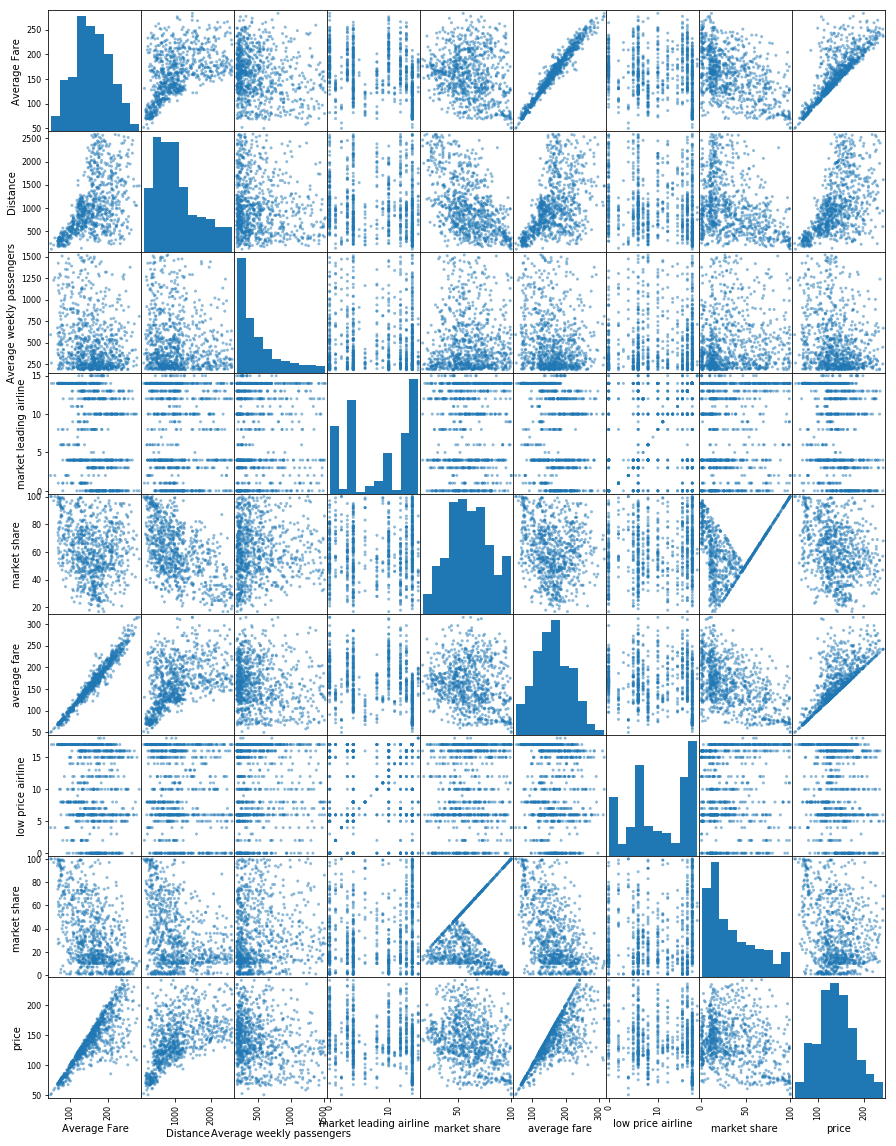

In [229]:
a = pd.scatter_matrix(ds, figsize = (15,20))

### Treat “Average Fare” – 3rdColumn  as your Dependent Variable and Rest of the columns as Independent Variable

In [230]:
y = ds.pop('Average Fare')

In [231]:
y = y.reshape(len(y),1)

C:\Users\GL\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [232]:
y.shape

(877L, 1L)

In [233]:
x = ds

In [234]:
x.columns

Index([u'Distance', u'Average weekly passengers', u'market leading airline',
       u'market share', u'average fare', u'low price airline',
       u'market share ', u'price'],
      dtype='object')

### Divide the data set into training and test data set and build a Multiple Linear Regression model. 

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [237]:
from sklearn.linear_model import LinearRegression

In [238]:
lr = LinearRegression()

In [271]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [272]:
x_train.shape

(613, 8)

In [273]:
y_train.shape

(613L, 1L)

### Print the accuracy of the overall model

In [281]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.9737838654389867
0.968982348145813


### Print the coefficients & intercepts of the linear regression model

In [282]:
lr.coef_

array([[ 0.00307272, -0.00357436, -0.18533737,  0.08979266,  0.75106502,
         0.05050639, -0.02319145,  0.19320844]])

In [287]:
coef1 = pd.DataFrame(lr.coef_, columns = x_train.columns)

In [288]:
x_train.columns

Index([u'Distance', u'Average weekly passengers', u'market leading airline',
       u'market share', u'average fare', u'low price airline',
       u'market share ', u'price'],
      dtype='object')

In [289]:
coef1

,Distance,Average weekly passengers,market leading airline,market share,average fare,low price airline,market share,price
0,0.003073,-0.003574,-0.185337,0.089793,0.751065,0.050506,-0.023191,0.193208


In [290]:
intercept = pd.DataFrame(lr.intercept_, columns = ["Intercept_Value"])

In [291]:
intercept

,Intercept_Value
0,5.909725
